# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [2]:
df.shape

(6000, 61)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [5]:
# train/test split
treereg = DecisionTreeClassifier(max_depth=3, random_state=123)
treereg.fit(X_train, y_train)
y_pred = treereg.predict(X_test)
print('f1_score:',round(metrics.f1_score(y_pred, y_test),3))
print('accuracy:',round(metrics.accuracy_score(y_pred, y_test),3))

f1_score: 0.624
accuracy: 0.649


In [6]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('f1_score:',round(metrics.f1_score(y_pred, y_test),3))
print('accuracy:',round(metrics.accuracy_score(y_pred, y_test),3))

f1_score: 0.609
accuracy: 0.622


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

Dividir

In [7]:
np .random.seed(123)
n_samples = X_train.shape[0]
n_B= 300

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

In [8]:
# show the rows for the first decision tree
X_train.iloc[samples[0]].head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
5207,323.0,8.0,482.0,0.497872,1.0,0.589905,15.0,3.0,11.0,0.0,...,0.460667,0.10,1.0,-0.216667,-0.50,-0.100,0.500000,0.050000,0.000000,0.050000
1290,407.0,14.0,647.0,0.527911,1.0,0.695980,26.0,5.0,15.0,1.0,...,0.422732,0.10,1.0,-0.408494,-1.00,-0.050,0.500000,-0.500000,0.000000,0.500000
4803,233.0,9.0,210.0,0.594059,1.0,0.704545,4.0,1.0,1.0,0.0,...,0.100000,0.10,0.1,-0.150000,-0.20,-0.100,0.000000,0.000000,0.500000,0.000000
5523,184.0,11.0,494.0,0.527835,1.0,0.643963,5.0,3.0,8.0,0.0,...,0.262175,0.05,0.5,-0.272569,-0.70,-0.050,0.454545,0.136364,0.045455,0.136364
5309,443.0,12.0,780.0,0.439689,1.0,0.612385,6.0,2.0,1.0,0.0,...,0.366549,0.05,1.0,-0.168056,-0.25,-0.125,0.000000,0.000000,0.500000,0.000000


In [9]:
n_estimators = 300

np.random.seed(123)
semillas = np.random.randint(1,10000,size=n_estimators)

In [10]:
arboles = {}
for i in range(100):
    arboles[i]=DecisionTreeClassifier(max_depth=None, random_state=semillas[i])
    arboles[i].fit(X_train.iloc[samples[i]],y_train.iloc[samples[i]])

In [11]:
for i in range(100,200):
    arboles[i]=DecisionTreeClassifier(max_depth=2, random_state=semillas[i])
    arboles[i].fit(X_train.iloc[samples[i]],y_train.iloc[samples[i]])

In [12]:
from sklearn.linear_model import LogisticRegression
for i in range(200,300):
    arboles[i]=LogisticRegression(random_state=semillas[i])
    arboles[i].fit(X_train.iloc[samples[i]],y_train.iloc[samples[i]])

In [13]:
y_pred_df = pd.DataFrame(index=X_test.index, columns=[list(range(n_B))])

for i in arboles:
    y_pred_df[i] = arboles[i].predict(X_test)

In [14]:
y_pred_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1123,1,0,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
943,0,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4062,1,1,1,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3203,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [15]:
y_pred_df.sum(axis=1)[:10]

1483    282
2185    270
2520    259
3721    266
3727     12
4524    168
234      19
4735     43
5839    114
2939    253
dtype: int64

In [16]:
y_pred_maj = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

In [17]:
from sklearn import metrics
print('f1_score:',round(metrics.f1_score(y_pred_maj, y_test),3))
print('accuracy:',round(metrics.accuracy_score(y_pred_maj, y_test),3))

f1_score: 0.638
accuracy: 0.648


# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [18]:
y_pred_maj.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,627,0.5225
1,573,0.4775


In [19]:
threshold =np.arange(0.0,1, 0.01)
f1_score=[]

for t in threshold:
    y_pred = (y_pred_df.sum(axis=1) >= (n_estimators)*t).astype(np.int)
    f1_score.append([ t, metrics.f1_score(y_pred, y_test)])

f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
f1_score.head()

,threshold,f1_score
0,0.00,0.661461
1,0.01,0.661461
2,0.02,0.662570
3,0.03,0.664422
4,0.04,0.667797


In [20]:
opti_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]
opti_f1_score

threshold    0.150000
f1_score     0.708166
Name: 15, dtype: float64

# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [21]:
samples_oob = []
n_samples = 300
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [22]:
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = arboles[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5,1,'OOB error of each tree')

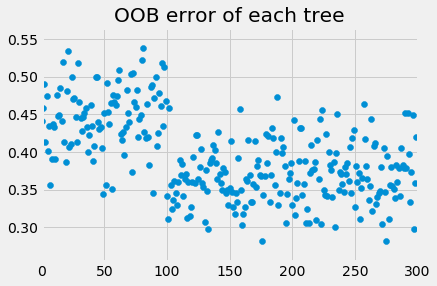

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [24]:
alpha = (1 - errors) / (1 - errors).sum()

In [25]:
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)
weighted_sum_1.head(5)

1483    0.946299
2185    0.906480
2520    0.873424
3721    0.896397
3727    0.037126
dtype: float64

In [26]:
threshold =np.arange(0.0,1, 0.01)
f1=[]
accuracy_score = []

for t in threshold:
    y_pred_wei = (weighted_sum_1 >= t ).astype(np.int)
    f1_score.append([ t, metrics.f1_score(y_pred_wei, y_test)])
    accuracy_score.append([t,metrics.accuracy_score(y_pred_wei, y_test)])
    
    
f1=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1=f1.loc[f1['f1_score'].idxmax()]

accuracy_score=pd.DataFrame(accuracy_score, columns=['threshold', 'accuracy_score'])
max_accuracy_score=accuracy_score.loc[accuracy_score['accuracy_score'].idxmax()]

print('Max f1-score:\n',max_f1)
print('Max accuracy_score:\n',max_accuracy_score)

Max f1-score:
 threshold    0.150000
f1_score     0.708166
Name: 15, dtype: float64
Max accuracy_score:
 threshold         0.460000
accuracy_score    0.655833
Name: 46, dtype: float64


# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [27]:
y_pred_wei = (weighted_sum_1 >= 0.5).astype(np.int)

In [28]:
y_pred_wei.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())

,count,percentage
0,632,0.526667
1,568,0.473333


In [29]:
threshold =np.arange(0.0,1, 0.005)
f1_score=[]

for i in threshold:
    y_pred = (weighted_sum_1 >=i ).astype(np.int)
    f1_score.append([ i, metrics.f1_score(y_pred, y_test)])
    
f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]

print('Max score:\n',max_f1_score)

Max score:
 threshold    0.130000
f1_score     0.708058
Name: 26, dtype: float64


# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



for i in range(200,300):
    arboles[i]=LogisticRegression(random_state=semillas[i])
    arboles[i].fit(X_train.iloc[samples[i]],y_train.iloc[samples[i]])

lr = LogisticRegression()
lr.fit(X_test, y_pred_wei)

y_pred_df= lr.predict(X_test)

In [36]:
threshold =np.arange(0.0,1, 0.01)
f1_score=[]

for  t in threshold:
    y_pred = np.where(lr.predict_proba(y_pred_df)[:,1] >= t, 1, 0)
    f1_score.append([ t, metrics.f1_score(y_pred_df, y_test)])
    
f1_score=pd.DataFrame(f1_score, columns=['threshold', 'f1_score'])
max_f1_score=f1_score.loc[f1_score['f1_score'].idxmax()]
print('Max score:\n',max_f1_score)

ValueError: Expected 2D array, got 1D array instead:
array=[1 1 1 ... 0 0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.